In [1]:
# Importing Libraries

import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data

df = pd.read_csv("C:\\Users\\sahil rawat\\Downloads\\data_jobs.csv")

# Data Cleanup
df ['job_posted_date'] = pd.to_datetime(df ['job_posted_date'])
df ['job_skills'] = df ['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [63]:
import seaborn as sns

In [42]:
df_US = df[df['job_country'] == 'United States']

In [43]:
df_skills = df_US.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby (['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
1785,vue.js,Business Analyst,1
60,arch,Business Analyst,1
71,asana,Machine Learning Engineer,1
968,no-sql,Machine Learning Engineer,1


In [44]:
job_titles = ['Data Analyst', 'Data Engineer','Data Scientist' ]

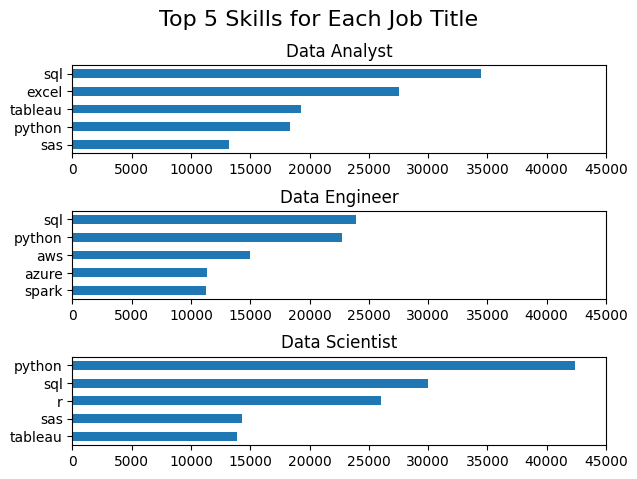

In [45]:
fig, ax = plt.subplots (3, 1)

for i, job_title in enumerate(job_titles):
   df_plot = df_skills_count [df_skills_count['job_title_short'] == job_title].head(5)
   df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
   ax[i].invert_yaxis()
   ax[i].set_ylabel('')
   ax[i].legend().remove()
   ax[i].set_xlim(0, 45000)
   ax[i]

fig.suptitle('Top 5 Skills for Each Job Title', fontsize=16)
plt.tight_layout(pad=.8)




In [56]:
df_job_total_count = df_US['job_title_short'].value_counts().reset_index(name='job_total')


In [57]:
df_skills_perc = pd.merge(df_skills_count, df_job_totals_count, on='job_title_short', how='left').sort_values(by='skill_count', ascending=False)

df_skills_perc['percentages'] = 100 * df_skills_perc['skill_count'] / df_skills_perc['job_total']

df_skills_perc

,job_skills,job_title_short,skill_count,job_total,percentages
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,vue.js,Business Analyst,1,7382,0.013546
1866,arch,Business Analyst,1,7382,0.013546
1867,asana,Machine Learning Engineer,1,921,0.108578
1868,no-sql,Machine Learning Engineer,1,921,0.108578


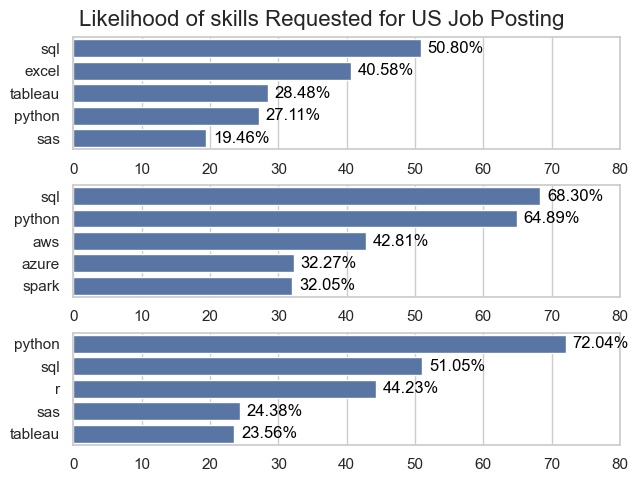

In [80]:
fig, ax = plt.subplots (len(job_titles), 1)

sns.set_theme(style="whitegrid")

for i, job_title in enumerate(job_titles):
   df_plot = df_skills_perc [df_skills_perc['job_title_short'] == job_title].head(5)
   sns.barplot(data=df_plot, x='percentages', y='job_skills', ax=ax[i],  hue= 'job_title_short')
   ax[i].set_ylabel('')
   ax[i].set_xlabel('')
   ax[i].legend().remove()
   ax[i].set_xlim(0, 80)

   for n, v in enumerate(df_plot['percentages']):
       ax[i].text(v + 1, n , f"{v:.2f}%", color='black', va='center')

   if i != 2 and i > 2:
       ax[i].set_xticks()
   

fig.suptitle('Likelihood of skills Requested for US Job Posting', fontsize=16)
plt.tight_layout(pad=0.5)
plt.show()